In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
demo = pd.read_csv('concrete.csv')

In [8]:
X = demo.drop('strength', axis=1)

In [9]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28


In [10]:
y = demo['strength']

In [11]:
y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
5       21.86
6       15.75
7       36.64
8       21.65
9       28.99
10      36.35
11       6.94
12      27.92
13      26.26
14      23.89
15      49.97
16      30.08
17      44.86
18      15.04
19      25.10
20      13.36
21      21.92
22      20.42
23      33.30
24      31.74
25      45.30
26      49.19
27      65.20
28      21.54
29      33.80
        ...  
1000    37.96
1001    22.84
1002    38.70
1003    80.20
1004    27.22
1005    50.24
1006     8.54
1007    16.11
1008    59.30
1009    45.71
1010    12.55
1011    25.10
1012    29.39
1013    62.94
1014    26.23
1015    42.64
1016    36.44
1017    44.21
1018    19.99
1019    23.52
1020    10.79
1021     9.56
1022    13.20
1023    10.39
1024    21.91
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .20, random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print('Training R2')
print(lr.score(Xtrain,ytrain))
print('Testing R2')
print(lr.score(Xtest,ytest))

Training R2
0.6374354064424276
Testing R2
0.5022375995887233


In [14]:
demo.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
Xtrain.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
34,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,90
124,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
712,298.1,0.0,107.0,186.4,6.1,879.0,815.2,28
859,300.0,0.0,0.0,184.0,0.0,1075.0,795.0,28
176,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,3


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.fit_transform(Xtest)
pd.DataFrame(scaledXtrain).head()

,0,1,2,3,4,5,6,7
0,0.466909,-0.844729,-0.838053,0.511263,-1.049767,0.667317,0.580232,0.744961
1,1.561349,-0.567621,0.389720,-0.902193,0.892115,-0.081871,-0.784522,0.180045
2,0.153804,-0.844729,0.824880,0.247418,-0.028605,-1.218571,0.507612,-0.285180
3,0.171886,-0.844729,-0.838053,0.134341,-1.049767,1.313169,0.254694,-0.285180
4,-0.494295,-0.844729,1.000499,0.676166,-0.279710,0.724152,-0.201059,-0.700560


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
demo = pd.read_csv('concrete.csv')
X = demo.drop('strength', axis=1)
y = demo.strength

In [29]:
poly = PolynomialFeatures(degree = 1)
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.20, random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.fit_transform(Xtest)
poly.fit(scaledXtrain)
polyXtrain = poly.transform(scaledXtrain)
polyXtest = poly.transform(scaledXtest)
lr = LinearRegression()
dt = RandomForestRegressor(n_estimators=900)
lr.fit(polyXtrain, ytrain)
dt.fit(polyXtrain, ytrain)
print('training accuracy')
print(lr.score(polyXtrain, ytrain))
print('testing accuracy')
print(lr.score(polyXtest, ytest))
print('')
print('training accuracy')
print(dt.score(polyXtrain, ytrain))
print('testing accuracy')
print(dt.score(polyXtest, ytest))

training accuracy
0.6374354064424277
testing accuracy
0.524757594239184

training accuracy
0.9840188551094733
testing accuracy
0.8261054796270786


In [31]:
polyXtrain.shape

(824, 9)

In [32]:
pd.DataFrame(polyXtrain).head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.466909,-0.844729,-0.838053,0.511263,-1.049767,0.667317,0.580232,0.744961
1,1.0,1.561349,-0.567621,0.389720,-0.902193,0.892115,-0.081871,-0.784522,0.180045
2,1.0,0.153804,-0.844729,0.824880,0.247418,-0.028605,-1.218571,0.507612,-0.285180
3,1.0,0.171886,-0.844729,-0.838053,0.134341,-1.049767,1.313169,0.254694,-0.285180
4,1.0,-0.494295,-0.844729,1.000499,0.676166,-0.279710,0.724152,-0.201059,-0.700560


In [33]:
lr.coef_

array([ 0.        , 12.68072174,  9.45264068,  5.35019754, -2.62980255,
        2.21222527,  1.88887792,  1.91920675,  7.48177113])

In [34]:
import seaborn as sns
sns.heatmap(pd.DataFrame(polyXtrain).corr())

In [37]:
print(lr.coef_)
print(lr.intercept_)

[ 0.         12.68072174  9.45264068  5.35019754 -2.62980255  2.21222527
  1.88887792  1.91920675  7.48177113]
36.16604368932038


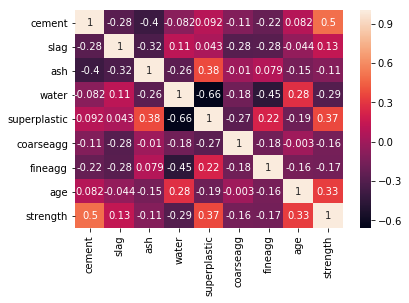

In [39]:
sns.heatmap(demo.corr(), annot=True)

In [41]:
poly = PolynomialFeatures(degree=3, include_bias=False)
trainaccuracy = []
testaccuracy = []
for i in range(100):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    polyXtrain = poly.fit_transform(Xtrain)
    polyXtest = poly.fit_transform(Xtest)
    lr.fit(polyXtrain,ytrain)
    trainaccuracy.append(lr.score(polyXtrain, ytrain))
    testaccuracy.append(lr.score(polyXtest, ytest))
print('training accuracy')
print(np.mean(trainaccuracy))
print('testing accuracy')
print(np.mean(testaccuracy))


training accuracy
0.9297995592896605
testing accuracy
0.8488608507793609


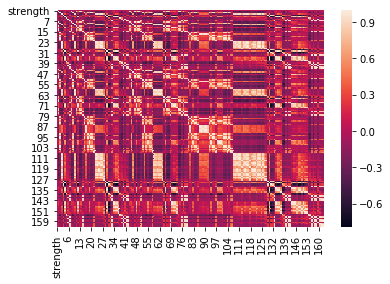

In [42]:
import matplotlib.pyplot as plt
sns.heatmap(pd.concat([pd.DataFrame(y), pd.DataFrame(polyXtrain)], axis = 1).corr())

In [45]:
pd.DataFrame(polyXtrain).corr()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,1.000000,-0.258325,-0.419244,-0.086220,0.087752,-0.121163,-0.201508,0.088352,0.982800,0.048677,...,-0.100125,-0.255340,0.082594,-0.261465,0.052181,0.092791,-0.173065,0.029728,0.071319,0.075364
1,-0.258325,1.000000,-0.305468,0.102921,0.062166,-0.311968,-0.285822,-0.069959,-0.236170,0.891167,...,-0.319076,-0.456118,-0.099854,-0.403605,-0.107915,-0.062381,-0.277386,-0.113136,-0.068088,-0.047077
2,-0.419244,-0.305468,1.000000,-0.241518,0.369027,0.004027,0.051013,-0.162783,-0.398241,-0.379222,...,0.006728,0.060563,-0.150269,0.060322,-0.145264,-0.177003,0.024335,-0.140080,-0.172915,-0.163310
3,-0.086220,0.102921,-0.241518,1.000000,-0.657570,-0.175544,-0.460493,0.273683,-0.091933,-0.024509,...,-0.182805,-0.412455,0.236981,-0.500156,0.205304,0.261093,-0.444918,0.165431,0.239350,0.244511
4,0.087752,0.062166,0.369027,-0.657570,1.000000,-0.278846,0.224738,-0.211952,0.094339,0.210133,...,-0.264939,-0.129852,-0.224832,0.101978,-0.199806,-0.224818,0.224840,-0.166768,-0.215231,-0.202445
5,-0.121163,-0.311968,0.004027,-0.175544,-0.278846,1.000000,-0.158708,0.013887,-0.119859,-0.355923,...,0.995782,0.813307,0.106192,0.218368,0.057946,0.020833,-0.181259,0.006434,0.009304,-0.004127
6,-0.201508,-0.285822,0.051013,-0.460493,0.224738,-0.158708,1.000000,-0.131460,-0.221860,-0.272637,...,-0.164350,0.438168,-0.135018,0.925356,-0.035525,-0.125912,0.990060,0.062896,-0.074430,-0.109707
7,0.088352,-0.069959,-0.162783,0.273683,-0.211952,0.013887,-0.131460,1.000000,0.078989,-0.058183,...,0.003863,-0.063390,0.988081,-0.108389,0.982157,0.932293,-0.108577,0.947598,0.918742,0.860836
8,0.982800,-0.236170,-0.398241,-0.091933,0.094339,-0.119859,-0.221860,0.078989,1.000000,0.030777,...,-0.094670,-0.270606,0.077701,-0.283780,0.041027,0.084927,-0.188647,0.014536,0.059604,0.065634
9,0.048677,0.891167,-0.379222,-0.024509,0.210133,-0.355923,-0.272637,-0.058183,0.030777,1.000000,...,-0.359543,-0.491741,-0.094690,-0.408930,-0.101788,-0.057635,-0.259039,-0.104917,-0.064409,-0.044526


In [48]:
np.abs(pd.concat([pd.DataFrame(y), pd.DataFrame(polyXtrain)],axis=1).corr())['strength'].sort_values()

86          0.000999
85          0.001218
64          0.001508
104         0.001668
106         0.001812
22          0.002038
152         0.002131
52          0.002245
97          0.003236
137         0.003310
93          0.003367
101         0.003659
16          0.003680
37          0.003683
82          0.005199
150         0.005416
84          0.005464
83          0.005684
95          0.006286
55          0.006779
18          0.007606
102         0.007673
60          0.007791
45          0.008320
163         0.008785
54          0.009058
58          0.009191
20          0.009433
56          0.009845
80          0.010129
              ...   
129         0.059517
134         0.059576
29          0.059605
146         0.059715
47          0.059792
145         0.059924
108         0.060556
30          0.061150
112         0.062262
25          0.062528
110         0.062760
121         0.063279
124         0.063515
26          0.063961
135         0.064332
136         0.064335
4           0